# Imported libraries

In [140]:
import pandas as pd
import seaborn as sns 
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import statistics
import numpy as np
import statistics
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVR

#Spajanje vise skupova podataka
data=pd.read_csv("Metro_Interstate_Traffic_Volume.csv")



## Printing data example

In [141]:
#prikaz podataka
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


## Showing data types

In [142]:
#Tipovi podataka
data.dtypes
#ocigledno ce biti potrebna konverzija nekih podataka

holiday                 object
temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main            object
weather_description     object
date_time               object
traffic_volume           int64
dtype: object

## Showing data info

In [143]:
#informacije o podacima
data.info()
#imamo informaciju o tome da nema null podataka

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


### Checking for missing values

In [144]:
#provera da li ima missing values
data.isna().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64

### Dropping duplicates

In [145]:
#brisanje duplikata
data.duplicated(subset=None, keep='first')
#data.drop_duplicates(subset=None, keep='first')

0        False
1        False
2        False
3        False
4        False
         ...  
48199    False
48200    False
48201    False
48202    False
48203    False
Length: 48204, dtype: bool

### Scaling 'clouds_all' data

In [146]:
scaler = MinMaxScaler()

    #Scaling cloud data
data[['clouds_all']] = scaler.fit_transform(data[['clouds_all']])
    #Scaling of temperature data
data[['temp']]=scaler.fit_transform(data[['temp']])

# Descriptive analytics

In [147]:
    #1 Mean of rain in millimeters per one hour 

averageRain = data['rain_1h'].mean()
print("Average rain per 1h: " + str(averageRain)) 

    #2 Mean of traffic volume 
averageTrafficVolume = data['traffic_volume'].mean()
print("Average traffic volume: " + str(averageTrafficVolume)) 

    #Harmonic mean
hmean = statistics.harmonic_mean(data['traffic_volume'])
print("Harmonic mean traffic volume: " + str(hmean)) 

    #3 Median of falling snow in 1h
medianSnow = data['snow_1h'].median()
print("Median snow on 1h: ", medianSnow)

    #4 Median of traffic volume
medianTrafficVolume = data['traffic_volume'].median()
print("Median traffic volume: " + str(medianTrafficVolume)) 

    #5 Standard deviation of traffic volume
standard_deviation = data['traffic_volume'].std()
print("Standard deviation of traffic volume: ", standard_deviation)

    #6 Standard deviation of temperature
standard_deviation = data['temp'].std()
print("Standard deviation of temp: ", standard_deviation)

#data.head(3000)
#data[['clouds_all']]

    #Converting temperature from Kelvin to Celsius
#data['Temperature'] = data['temp'].subtract(273.16)


    #Output sMinimum and Maximum Temperature
minTemp = data['temp'].min()
maxTemp = data['temp'].max()
print("Minimum temperature: ", minTemp, "Maximum temperature: ", maxTemp)

    #range of data - difference between inimum and maximum
rangee=np.ptp(data['traffic_volume'])
print("range guzve je:", rangee)

rangee=np.ptp(data['temp'])
print("range temperature je:", rangee)



    #Mode
mode = data['traffic_volume'].mode()
print("Mode of traffic volume: ", mode)

variance = statistics.variance(data['traffic_volume'])
print("Variance of traffic volume: ", variance)

Average rain per 1h: 0.33426396149697535
Average traffic volume: 3259.8183553232097
Harmonic mean traffic volume: 0
Median snow on 1h:  0.0
Median traffic volume: 3380.0
Standard deviation of traffic volume:  1986.8606704463552
Standard deviation of temp:  0.043016841076777335
Minimum temperature:  0.0 Maximum temperature:  1.0
range guzve je: 7280
range temperature je: 1.0
Mode of traffic volume:  0    353
1    356
Name: traffic_volume, dtype: int64
Variance of traffic volume:  3947615.3237665542


### Describing target data

In [148]:
#opis podataka
#scipy describe
result = stats.describe(data['traffic_volume'], ddof=1, bias=False)
print(str(result))
#pandas describe
data.describe()

DescribeResult(nobs=48204, minmax=(0, 7280), mean=3259.8183553232097, variance=3947615.3237665547, skewness=-0.08938135143647916, kurtosis=-1.3090882117269556)


,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,0.906911,0.334264,0.000222,0.493622,3259.818355
std,0.043017,44.789133,0.008168,0.390158,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.877737,0.000000,0.000000,0.010000,1193.000000
50%,0.910923,0.000000,0.000000,0.640000,3380.000000
75%,0.941097,0.000000,0.000000,0.900000,4933.000000
max,1.000000,9831.300000,0.510000,1.000000,7280.000000


### Describing object data

In [149]:
#opis objekata

#pandas describe objects
data.describe(include='object')

,holiday,weather_main,weather_description,date_time
count,48204,48204,48204,48204
unique,12,11,38,40575
top,None,Clouds,sky is clear,2013-05-19 10:00:00
freq,48143,15164,11665,6


### Checking 'date_time' data

In [150]:
# pocetak i kraj zapisa podataka
print("Start :" +data['date_time'].max())
print("End :" +data['date_time'].min())

Start :2018-09-30 23:00:00
End :2012-10-02 09:00:00


### Checking 'weather_main' data by temperature

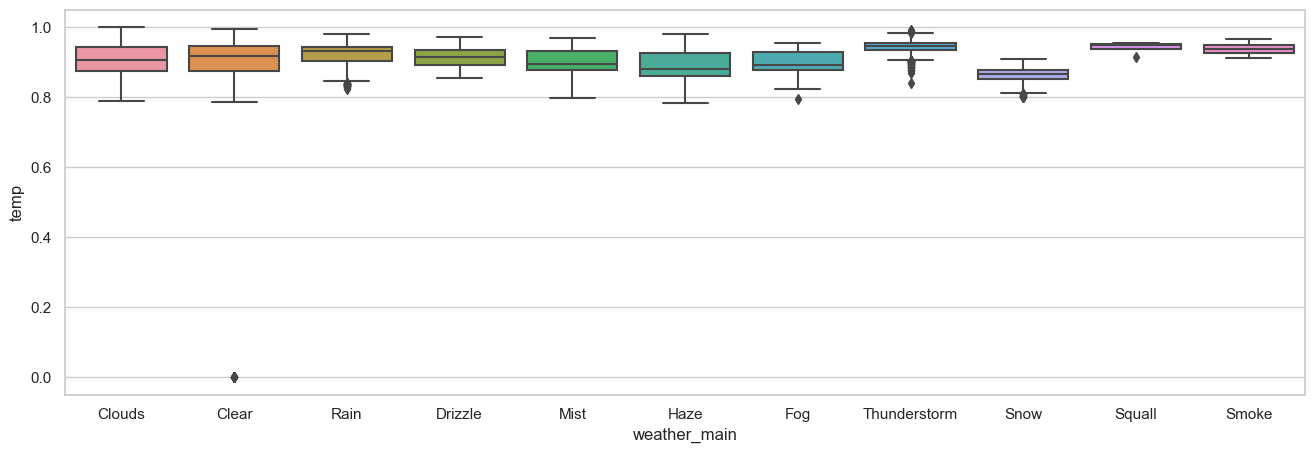

In [151]:
%matplotlib inline
sns.set(style="whitegrid")
plt.figure(figsize=(16,5))
ax = sns.boxplot( x="weather_main", y="temp", data=data, orient="v")

### Pie plotting 'weather_description' data

<AxesSubplot:ylabel='weather_description'>

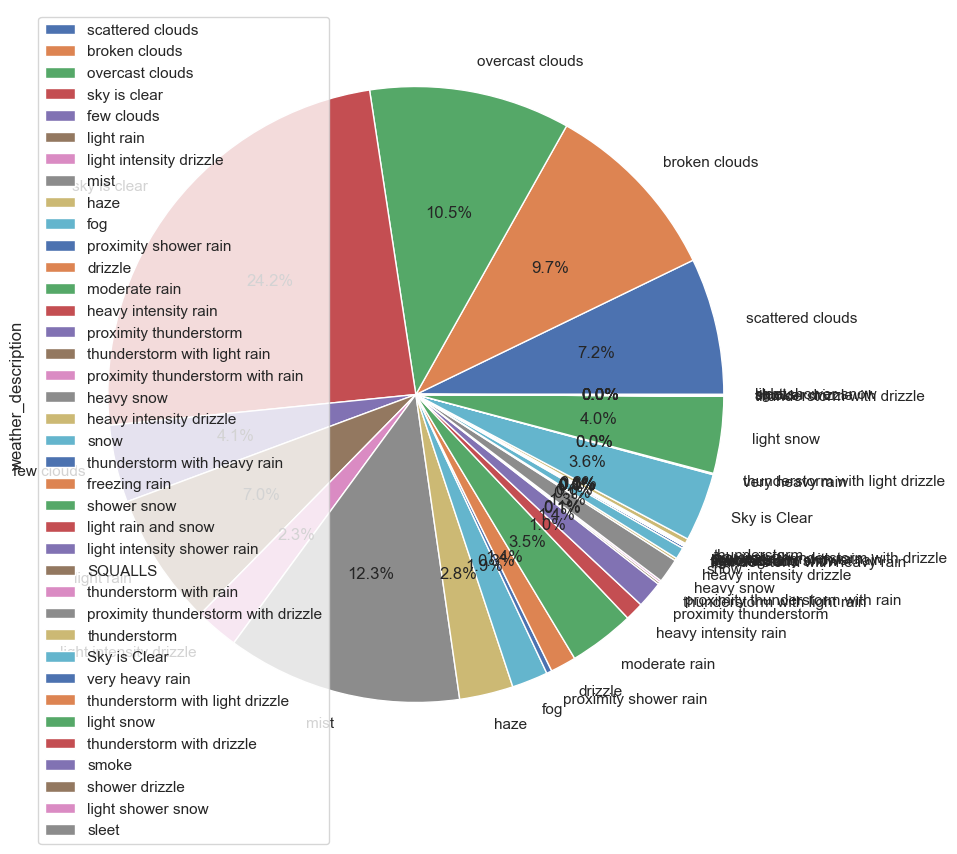

In [152]:
type_counts = data['weather_description'].value_counts()
df2 = pd.DataFrame({'weather_description': type_counts}, 
                     index = ['scattered clouds', 'broken clouds', 'overcast clouds', 'sky is clear',
    'few clouds', 'light rain', 'light intensity drizzle', 'mist', 'haze', 'fog',
    'proximity shower rain', 'drizzle', 'moderate rain', 'heavy intensity rain',
    'proximity thunderstorm', 'thunderstorm with light rain',
    'proximity thunderstorm with rain', 'heavy snow', 'heavy intensity drizzle',
    'snow', 'thunderstorm with heavy rain', 'freezing rain', 'shower snow',
    'light rain and snow', 'light intensity shower rain', 'SQUALLS',
    'thunderstorm with rain', 'proximity thunderstorm with drizzle',
    'thunderstorm', 'Sky is Clear', 'very heavy rain',
    'thunderstorm with light drizzle', 'light snow',
    'thunderstorm with drizzle', 'smoke', 'shower drizzle', 'light shower snow',
    'sleet'])
df2.plot.pie(y='weather_description', figsize=(10,10), autopct='%1.1f%%')

### Countplotting holiday data

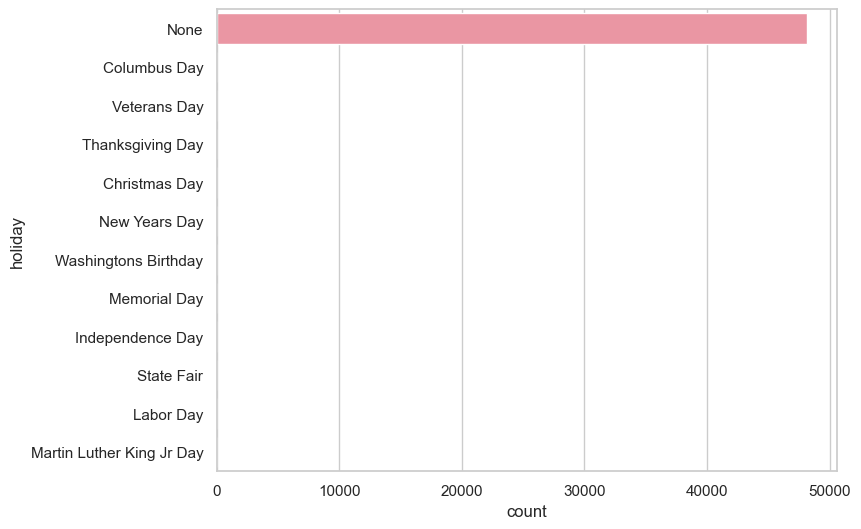

In [153]:
plt.figure(figsize = (8,6))
sns.countplot(y='holiday', data = data)
plt.show()

### Countplotting holiday data excluding 'None'

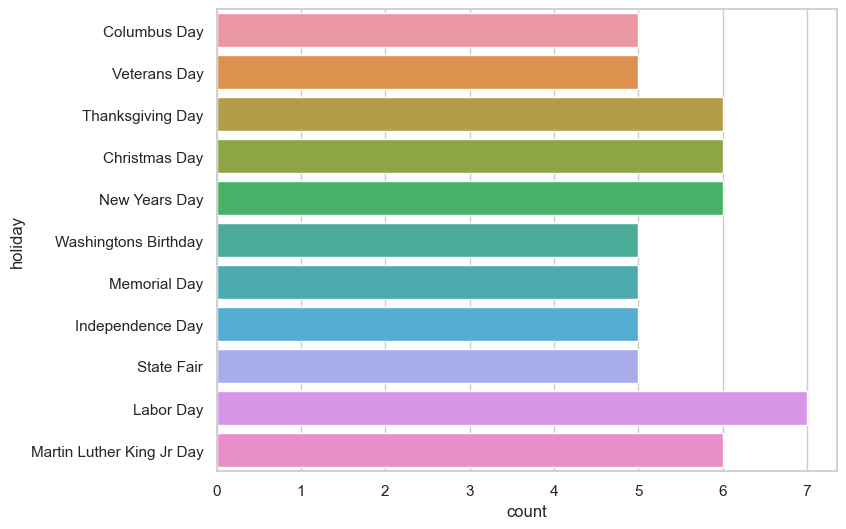

In [154]:
#'None' predstavlja problem, jer ga ima mnogo vise od ostalih dana
holidays = data.loc[data['holiday'] != 'None']
plt.figure(figsize=(8,6))
sns.countplot(y='holiday', data= holidays)
plt.show()
#ovaj prikaz je znatno bolji i daje prikaz o praznicima, obzirom na to da su praznici svake godine na isti dan, jasno je da je broj slican

### Boxplotting temperature data

c:\Users\Legion\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


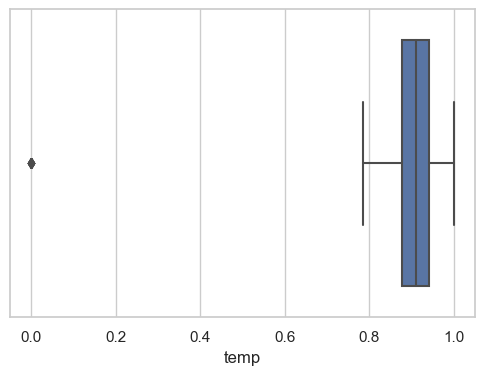

In [155]:
#prikaz podataka o temperaturi
plt.figure(figsize=(6,4))
sns.boxplot('temp', data = data)
plt.show()
#iz prikaza je jasno da postoji oversempling koji oze da utice na mean vrednost

### Temperature switch from Kelvin to Celsius 

In [156]:
# prebacivanje temperature iz kelvina u celzius zato sto je celzius laksi za razumevanje, bar nama
#data['temp'] = (data['temp']-273.15)
#plt.figure(figsize=(6,4))
#sns.boxplot('temp', data = data)
#plt.show()

### Checking rain per 1h data

<Figure size 600x400 with 0 Axes>

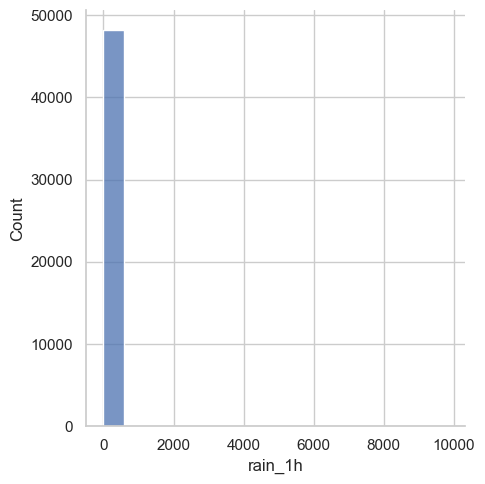

In [157]:
#prikaz podataka o kisi
plt.figure(figsize=(6,4))
sns.displot(data.rain_1h)
plt.show()
# iz prikazanog se vidi da su podaci sto se tice kise delom nekonzistentni, a i u atribut weather_main govori kada je kisa


### Checking rain per 1h less than 1

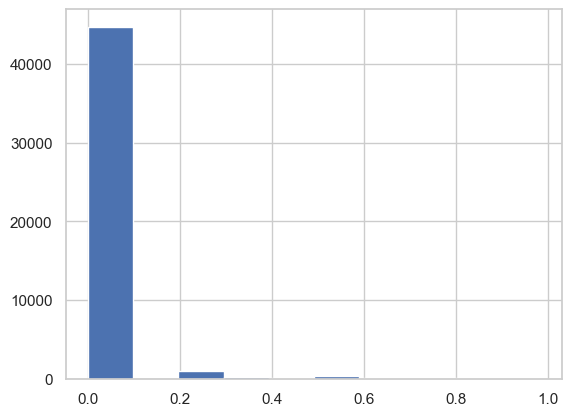

In [158]:
#histogram koji govori o padavimana i koliko u proseku padavina ima oko koje vrednosti
plt.hist(data.rain_1h.loc[data.rain_1h<1])
plt.show()
#jasan prikaz da uglavnom nema kise

### Checking snow per 1h

<Figure size 600x400 with 0 Axes>

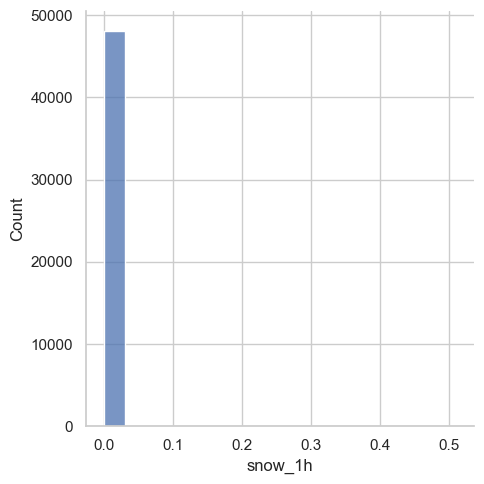

In [159]:
plt.figure(figsize=(6,4))
sns.displot(data.snow_1h)
plt.show()

### Checking rain per 1h data

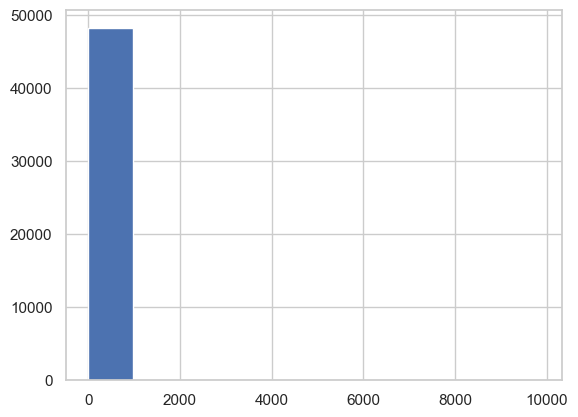

In [160]:
plt.hist(data.rain_1h.loc[data.snow_1h<1])
plt.show()

### Describing 'clouds_all' data

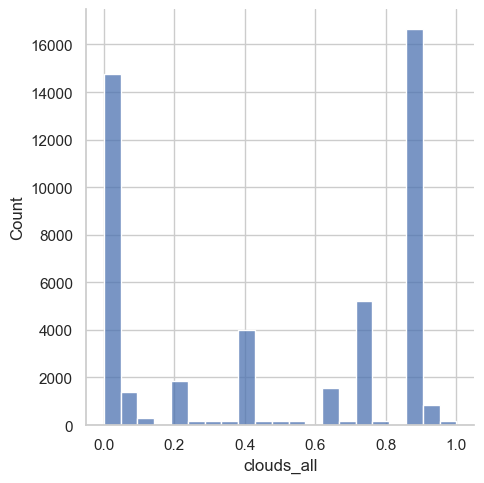

count    48204.000000
mean         0.493622
std          0.390158
min          0.000000
25%          0.010000
50%          0.640000
75%          0.900000
max          1.000000
Name: clouds_all, dtype: float64

In [161]:
#oblacnost 
sns.displot(data.clouds_all)
plt.show()
data['clouds_all'].describe()

### Countplotting 'weather_main' data

<AxesSubplot:xlabel='count', ylabel='weather_main'>

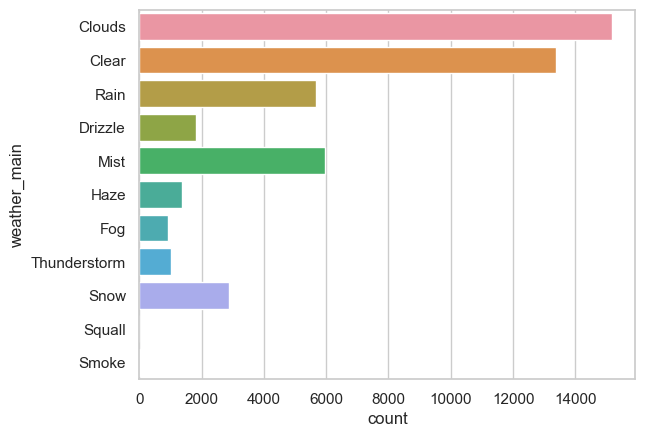

In [162]:
#prikaz podataka o tipovima vremena
sns.countplot(y='weather_main', data=data)

### Piechart of 'weather_main' data

<AxesSubplot:ylabel='Weather Type'>

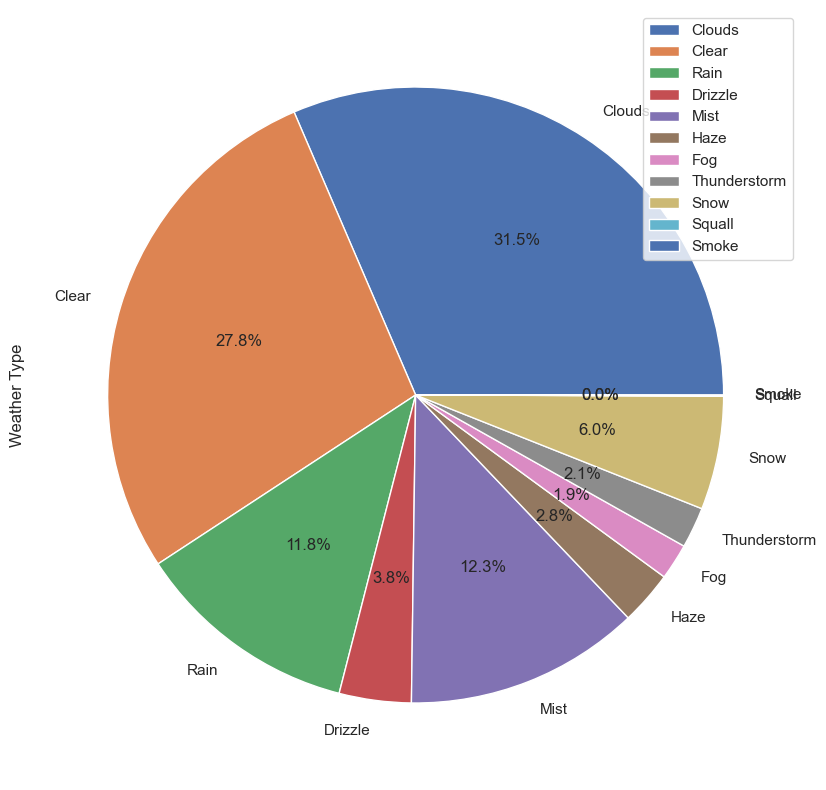

In [163]:

type_counts = data['weather_main'].value_counts()
df2 = pd.DataFrame({'Weather Type': type_counts}, 
                     index = ['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog', 'Thunderstorm', 'Snow', 'Squall', 'Smoke']
                   )
df2.plot.pie(y='Weather Type', figsize=(10,10), autopct='%1.1f%%')

### Counting 'traffic_volume' data

<AxesSubplot:xlabel='traffic_volume', ylabel='Count'>

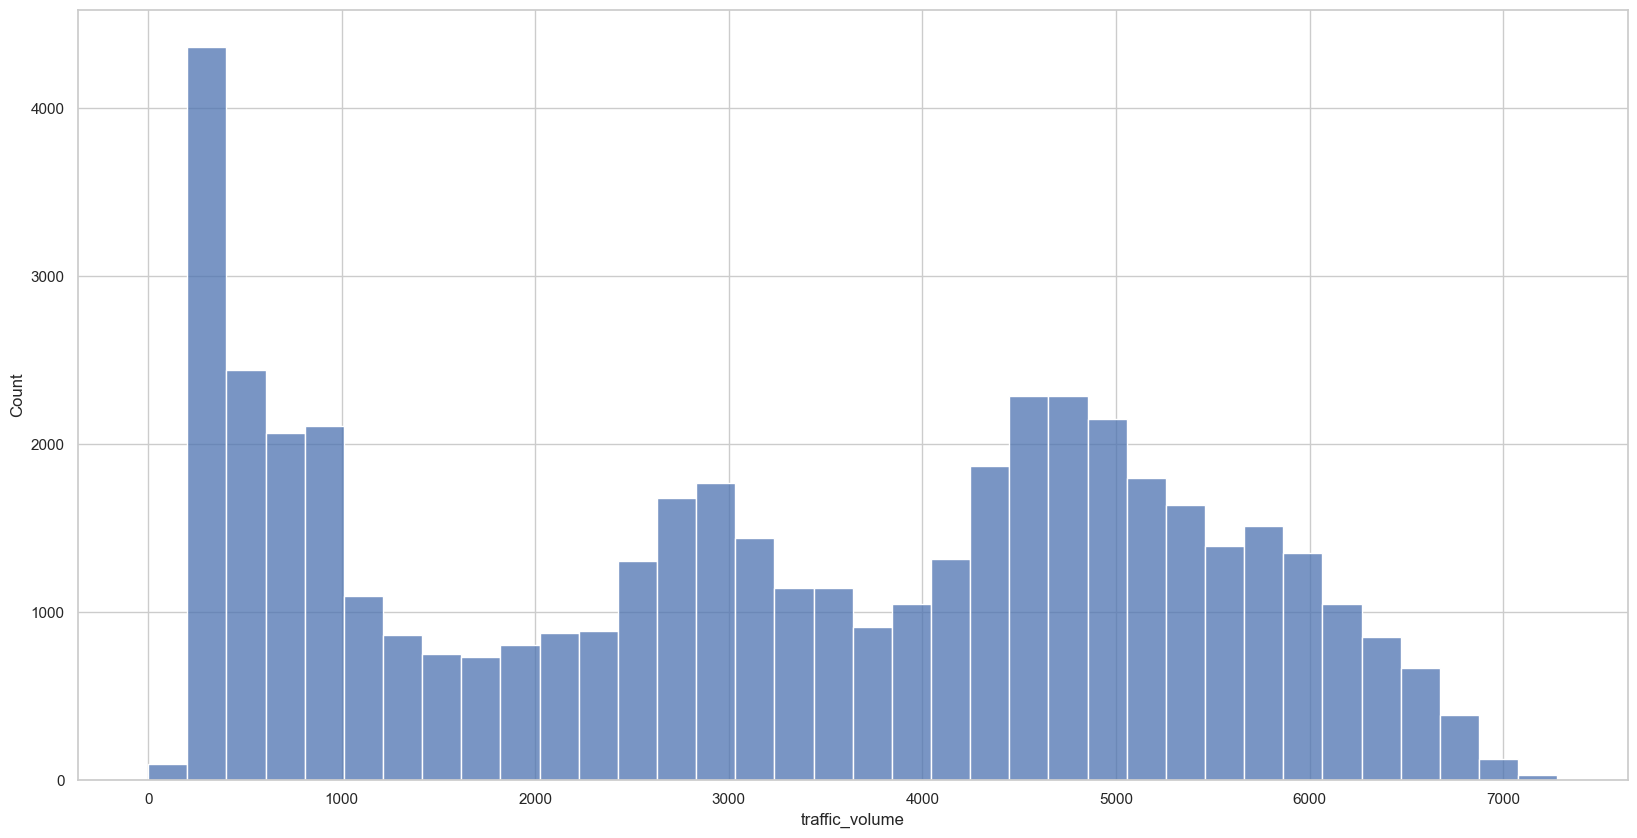

In [164]:
#histogram koji prikazuje vrednosti guzve izmedju vrednosti od minimalne do maksimalne
filter_data = data.dropna(subset=['traffic_volume'])
plt.figure(figsize=(20,10))
sns.histplot(filter_data['traffic_volume'], kde=False)
#sa histograma se vidi da je najvise vrednosti guzve izmedju 200 i 400

### Checking 'weather_description' data

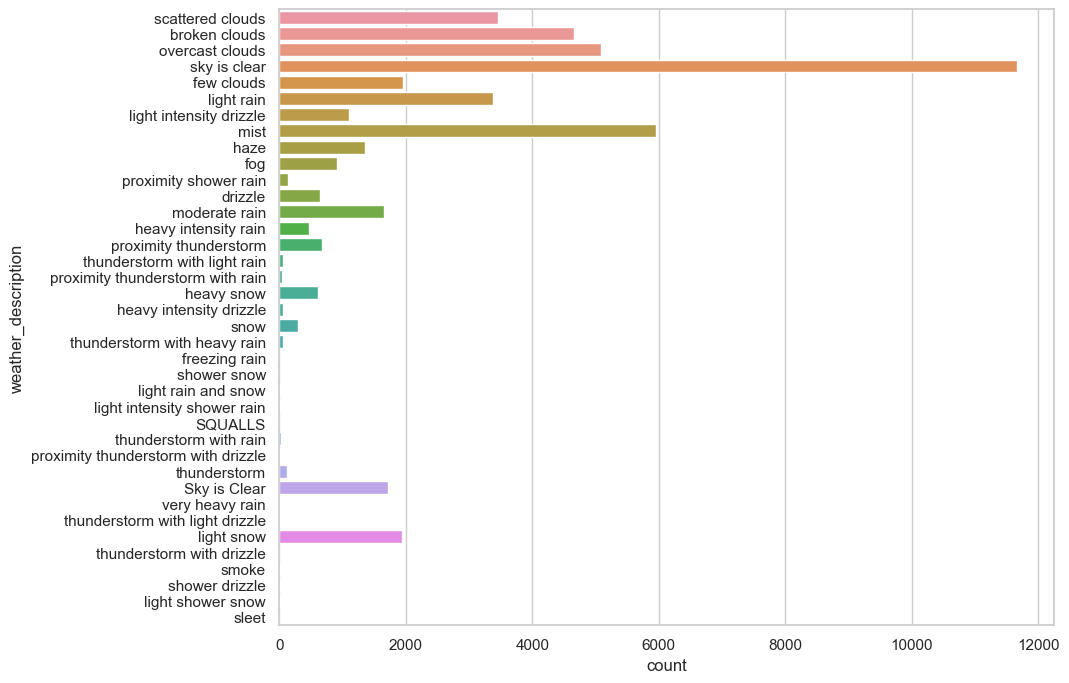

In [165]:
#opisi tipova vremena
plt.figure(figsize=(10,8))
sns.countplot(y='weather_description', data=data)
plt.show()
#jasno je da je opis tipova vremena feature koji je suvisan, jer vec postoji vremenska prilika

### Checking traffic volume for holidays

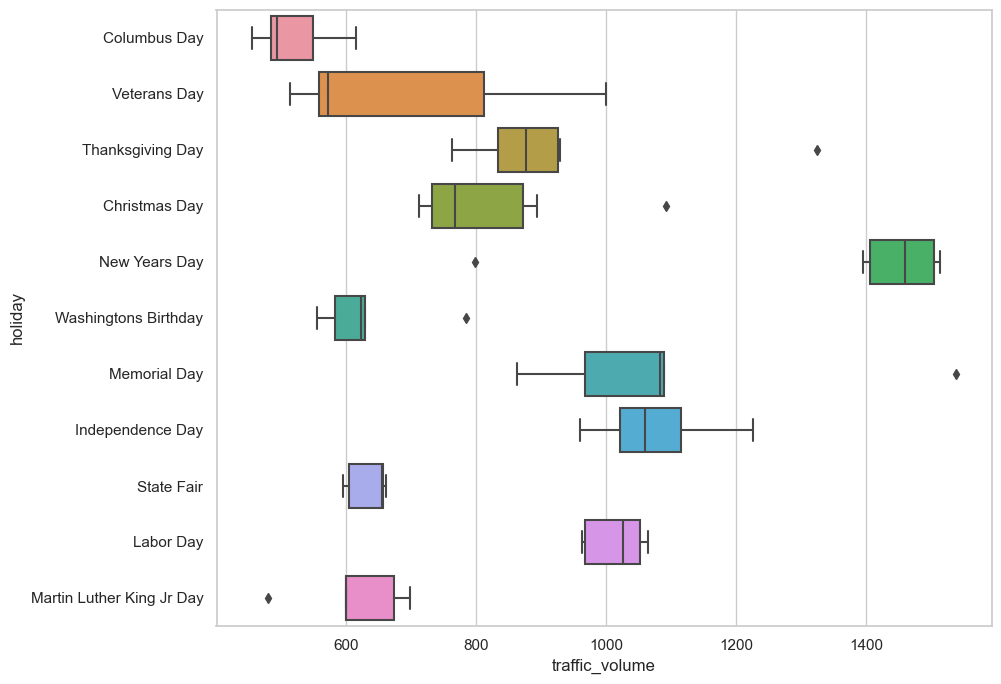

In [166]:
#poredjenje gustine saobracaja za praznike
plt.figure(figsize=(10,8))
sns.boxplot(y='holiday',x='traffic_volume', data = holidays)
plt.show()

### Traffic volume dependency by temperature

<Figure size 1000x800 with 0 Axes>

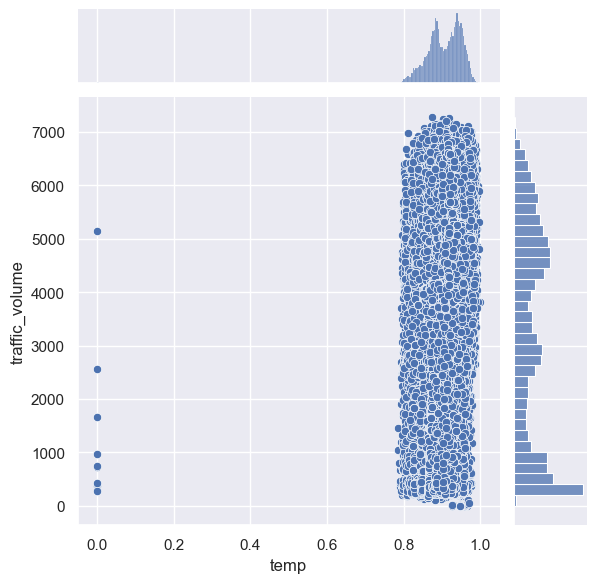

In [167]:
#zavisnost guzve od temperature
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.jointplot(y='traffic_volume', x='temp', data = data.loc[data.temp>-50])
plt.show()

### Checking traffic volume dependency by clouds coverage of the sky 

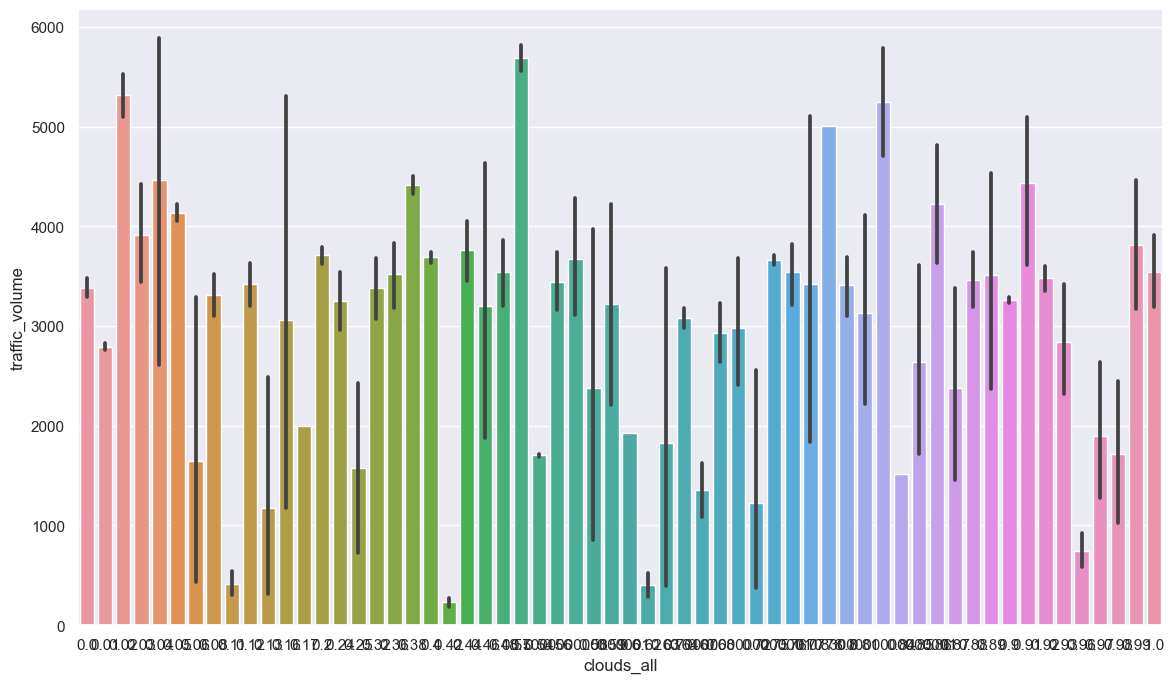

In [168]:
#prikaz zavisnosti guzve od oblacnosti 
plt.figure(figsize=(14,8))
sns.barplot(x='clouds_all', y = 'traffic_volume', data = data)
plt.show()

### Traffic volume dependency by weather type

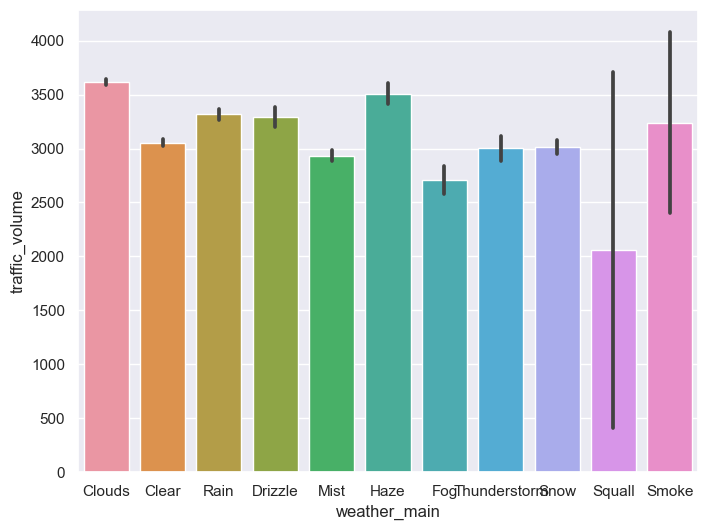

In [169]:
#prikaz zavisnosti guzve od tipa vremena
plt.figure(figsize=(8,6))
sns.barplot(x='weather_main', y = 'traffic_volume', data = data)
plt.show()

### Corelation using heatmap

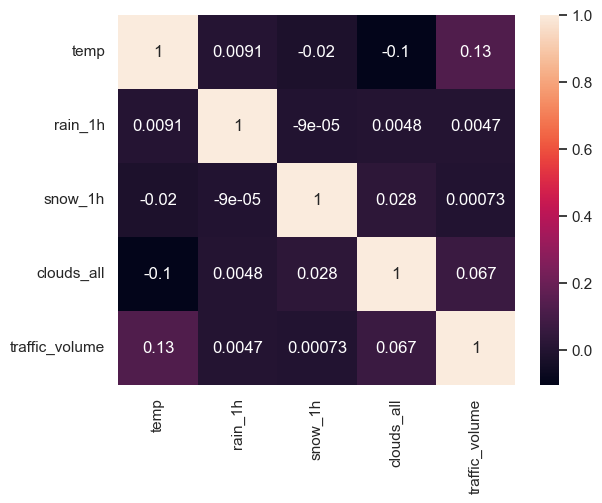

In [170]:
#trazenje jake korelacije izmedju guzve i nekog od feature-a, uz pomoc toplotne mape
sns.heatmap(data.corr(), annot=True)
plt.show()

### Checking correlation coefficient

In [171]:
corr_matrix = np.corrcoef(data['rain_1h'], data['clouds_all'])
print(corr_matrix)

[[1.         0.00481813]
 [0.00481813 1.        ]]


# Preprocessing and cleaning data



In [172]:
df = data.copy()
df['date_time'] = pd.to_datetime(df.date_time)
df['weekday'] = df.date_time.dt.weekday#dani u nedelji idu od 0 do 6, gde je ponedeljak 0..
df['date'] = df.date_time.dt.date
df['hour'] = df.date_time.dt.hour
df['month'] = df.date_time.dt.month
df['year'] = df.date_time.dt.year

df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,date,hour,month,year
0,None,0.929726,0.0,0.0,0.40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,1,2012-10-02,9,10,2012
1,None,0.933209,0.0,0.0,0.75,Clouds,broken clouds,2012-10-02 10:00:00,4516,1,2012-10-02,10,10,2012
2,None,0.933918,0.0,0.0,0.90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,1,2012-10-02,11,10,2012
3,None,0.935692,0.0,0.0,0.90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,1,2012-10-02,12,10,2012
4,None,0.938949,0.0,0.0,0.75,Clouds,broken clouds,2012-10-02 13:00:00,4918,1,2012-10-02,13,10,2012


## Transforming hours to daytime period

In [173]:
#prevodjenje tacnog vremena u objekte, tj kategoricke podatke 
def hour_modify(x):
    Early_Morning = [4,5,6,7]
    Morning = [8,9,10,11]
    Afternoon = [12,13,14,15]
    Evening = [16,17,18,19]
    Night = [20,21,22,23]
    Late_Night = [24,1,2,3]
    if x in Early_Morning:
        return 'Early_Morning'
    elif x in Morning:
        return 'Morning'
    elif x in Afternoon:
        return 'Afternoon'
    elif x in Evening:
        return 'Evening'
    elif x in Night:
        return 'Night'
    else:
        return 'Late_Night'
    
df['hour'] = df.hour.map(hour_modify)
df.head(6)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,date,hour,month,year
0,None,0.929726,0.0,0.0,0.40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,1,2012-10-02,Morning,10,2012
1,None,0.933209,0.0,0.0,0.75,Clouds,broken clouds,2012-10-02 10:00:00,4516,1,2012-10-02,Morning,10,2012
2,None,0.933918,0.0,0.0,0.90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,1,2012-10-02,Morning,10,2012
3,None,0.935692,0.0,0.0,0.90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,1,2012-10-02,Afternoon,10,2012
4,None,0.938949,0.0,0.0,0.75,Clouds,broken clouds,2012-10-02 13:00:00,4918,1,2012-10-02,Afternoon,10,2012
5,None,0.940820,0.0,0.0,0.01,Clear,sky is clear,2012-10-02 14:00:00,5181,1,2012-10-02,Afternoon,10,2012


## Transforming day to weekday type

In [174]:
#prevodjenje dana u kategoricke podatke 
def day_modify(x):
    Weekend = [5, 6]
    WeekDay = [0, 1, 2 ,3 ,4]
    
    if x in WeekDay:
        return 'WeekDay'
    else:
        return 'Weekend'

df['weekday'] = df.weekday.map(day_modify)
df.head(6)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,date,hour,month,year
0,None,0.929726,0.0,0.0,0.40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,WeekDay,2012-10-02,Morning,10,2012
1,None,0.933209,0.0,0.0,0.75,Clouds,broken clouds,2012-10-02 10:00:00,4516,WeekDay,2012-10-02,Morning,10,2012
2,None,0.933918,0.0,0.0,0.90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,WeekDay,2012-10-02,Morning,10,2012
3,None,0.935692,0.0,0.0,0.90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,WeekDay,2012-10-02,Afternoon,10,2012
4,None,0.938949,0.0,0.0,0.75,Clouds,broken clouds,2012-10-02 13:00:00,4918,WeekDay,2012-10-02,Afternoon,10,2012
5,None,0.940820,0.0,0.0,0.01,Clear,sky is clear,2012-10-02 14:00:00,5181,WeekDay,2012-10-02,Afternoon,10,2012


## Transforming months to quartals

In [175]:
#prevodjenje meseci u objekte
def month_modify(x):
    First_Quartal = [1,2,3]
    Second_Quartal = [4,5,6]
    Third_Quartal = [7,8,9]
    Fourth_Quartal = [10,11,12]
    if x in First_Quartal:
        return 'First_Quartal'
    elif x in Second_Quartal:
        return 'Second_Quartal'
    elif x in Third_Quartal:
        return 'Third_Quartal'
    else:
        return 'Fourth_Quartal'
    
df['month'] = df.month.map(month_modify)
df.head(6)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,date,hour,month,year
0,None,0.929726,0.0,0.0,0.40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,WeekDay,2012-10-02,Morning,Fourth_Quartal,2012
1,None,0.933209,0.0,0.0,0.75,Clouds,broken clouds,2012-10-02 10:00:00,4516,WeekDay,2012-10-02,Morning,Fourth_Quartal,2012
2,None,0.933918,0.0,0.0,0.90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,WeekDay,2012-10-02,Morning,Fourth_Quartal,2012
3,None,0.935692,0.0,0.0,0.90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,WeekDay,2012-10-02,Afternoon,Fourth_Quartal,2012
4,None,0.938949,0.0,0.0,0.75,Clouds,broken clouds,2012-10-02 13:00:00,4918,WeekDay,2012-10-02,Afternoon,Fourth_Quartal,2012
5,None,0.940820,0.0,0.0,0.01,Clear,sky is clear,2012-10-02 14:00:00,5181,WeekDay,2012-10-02,Afternoon,Fourth_Quartal,2012


## Checking traffic volume in weekdays/weekends

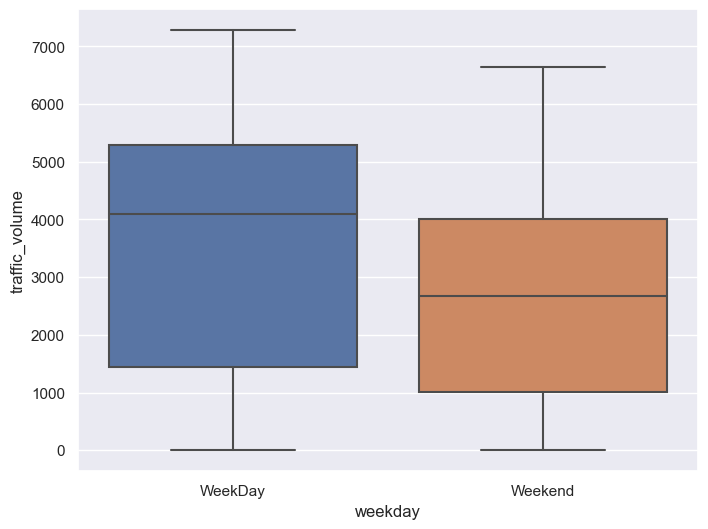

In [176]:
#Guzva za dane u nedelji
plt.figure(figsize=(8,6))
sns.boxplot(x='weekday', y='traffic_volume', data = df)
plt.show()

## Checking traffic volume per years

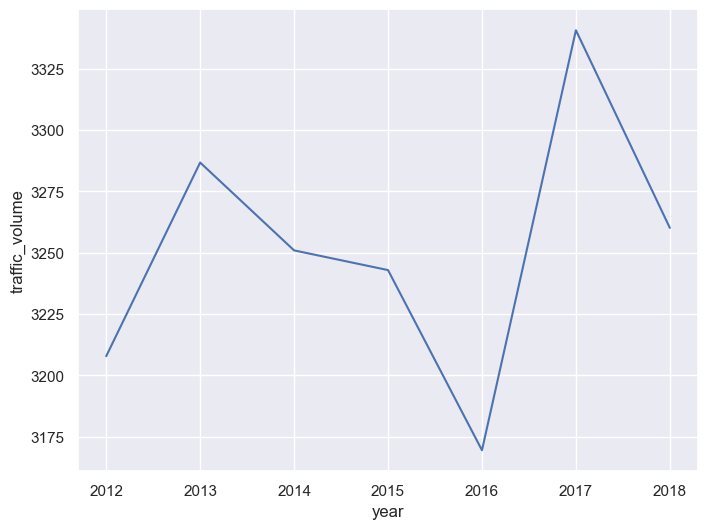

In [177]:
# prikaz guzve na godisnjem nivou
df_date_traffic = df.groupby('year').aggregate({'traffic_volume':'mean'})
plt.figure(figsize=(8,6))
sns.lineplot(x = df_date_traffic.index, y = df_date_traffic['traffic_volume'], data = df_date_traffic)
plt.show()

### Transforming holiday data

In [178]:
#pretvaranje praznika u true ili false, dan ili jeste praznik ili nije
def modify_holiday(x):
    if x == 'None':
        return False
    else:
        return True
df['holiday'] = df['holiday'].map(modify_holiday)
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,date,hour,month,year
0,False,0.929726,0.0,0.0,0.40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,WeekDay,2012-10-02,Morning,Fourth_Quartal,2012
1,False,0.933209,0.0,0.0,0.75,Clouds,broken clouds,2012-10-02 10:00:00,4516,WeekDay,2012-10-02,Morning,Fourth_Quartal,2012
2,False,0.933918,0.0,0.0,0.90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,WeekDay,2012-10-02,Morning,Fourth_Quartal,2012
3,False,0.935692,0.0,0.0,0.90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,WeekDay,2012-10-02,Afternoon,Fourth_Quartal,2012
4,False,0.938949,0.0,0.0,0.75,Clouds,broken clouds,2012-10-02 13:00:00,4918,WeekDay,2012-10-02,Afternoon,Fourth_Quartal,2012


### Dropping outliers from temperature data

c:\Users\Legion\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


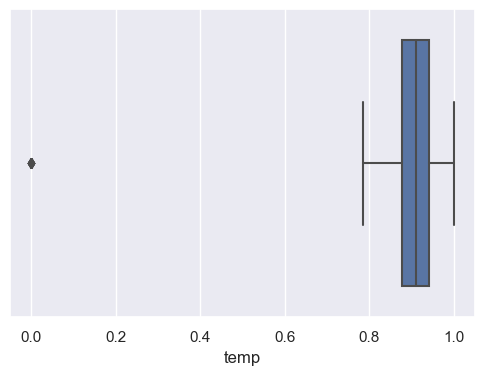

In [179]:
#uklanjanje outliera
df = df.loc[df.temp>-250]
#df['temp'] = (df['temp']-273.15)
plt.figure(figsize=(6,4))
sns.boxplot('temp', data = df)
plt.show()

## Checking traffic volume by holidays

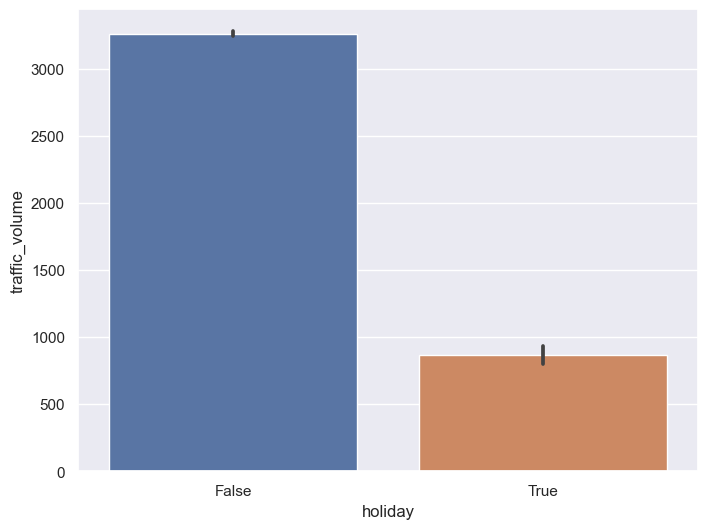

In [180]:
#razlika u guzvi kada je praznik i kada nije
plt.figure(figsize=(8,6))
sns.barplot(x='holiday', y='traffic_volume', data = df)
plt.show()

## Dropping unnecessary columns

In [181]:
#uklanjanje podataka o tome da li je kisa ili sneg jer se vec na osnovu parametra weather zna da li jeste ili nije
df.drop(columns = ['rain_1h','snow_1h', 'weather_description'],inplace = True)#note- moze da se prebaci i snow no snow u true i false, takodje i za kisu, ali nekako deluje kao da to vec znamo na osnovu tekucih vremennskih prilika
df.head()

,holiday,temp,clouds_all,weather_main,date_time,traffic_volume,weekday,date,hour,month,year
0,False,0.929726,0.40,Clouds,2012-10-02 09:00:00,5545,WeekDay,2012-10-02,Morning,Fourth_Quartal,2012
1,False,0.933209,0.75,Clouds,2012-10-02 10:00:00,4516,WeekDay,2012-10-02,Morning,Fourth_Quartal,2012
2,False,0.933918,0.90,Clouds,2012-10-02 11:00:00,4767,WeekDay,2012-10-02,Morning,Fourth_Quartal,2012
3,False,0.935692,0.90,Clouds,2012-10-02 12:00:00,5026,WeekDay,2012-10-02,Afternoon,Fourth_Quartal,2012
4,False,0.938949,0.75,Clouds,2012-10-02 13:00:00,4918,WeekDay,2012-10-02,Afternoon,Fourth_Quartal,2012


## Counting weather condition rows

In [182]:
df['weather_main'].value_counts()


Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: weather_main, dtype: int64

## Merging similar weather conditions

In [183]:
#vremenske prilike koje su slicne stavljene u isti tip
df.loc[df['weather_main'].str.contains('Haze'),'weather_main'] = 'Fog'   
df.loc[df['weather_main'].str.contains('Mist'),'weather_main'] = 'Fog'   
df.loc[df['weather_main'].str.contains('Smoke'),'weather_main'] = 'Fog'   
df.loc[df['weather_main'].str.contains('Squall'),'weather_main'] = 'Thunderstorm'       
df['weather_main'].value_counts()

Clouds          15164
Clear           13391
Fog              8242
Rain             5672
Snow             2876
Drizzle          1821
Thunderstorm     1038
Name: weather_main, dtype: int64

### One-Hot encoding test example 1

In [184]:
# #one hot endocing hour
# # Use as many lines of code as you need!
# OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
# OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[['hour']]))

# # One-hot encoding removed index; put it back
# OH_cols.index = df.index
# column_name = OH_encoder.get_feature_names_out(['hour'])
# OH_cols.columns = column_name

# # Remove categorical columns (will replace with one-hot encoding)
# num_X = df.drop("hour", axis=1)
# OH_X = pd.concat([num_X, OH_cols], axis=1)
# #one_hot_encoded_frame = pd.DataFrame.sparse.from_spmatrix(OH_X, columns= column_name)

# df=OH_X
# OH_cols = pd.DataFrame(df[['traffic_volume']])
# num_X = df.drop("traffic_volume", axis=1)
# Odf_X = pd.concat([num_X, OH_cols], axis=1)
# df=Odf_X
# df.head()

### One-Hot encoding test example 2

In [185]:
# #one hot endocing mesec
# # Use as many lines of code as you need!
# OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
# OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[['month']]))

# # One-hot encoding removed index; put it back
# OH_cols.index = df.index
# column_name = OH_encoder.get_feature_names_out(['month'])
# OH_cols.columns = column_name

# # Remove categorical columns (will replace with one-hot encoding)
# num_X = df.drop("month", axis=1)
# OH_X = pd.concat([num_X, OH_cols], axis=1)
# #one_hot_encoded_frame = pd.DataFrame.sparse.from_spmatrix(OH_X, columns= column_name)

# df=OH_X
# OH_cols = pd.DataFrame(df[['traffic_volume']])
# num_X = df.drop("traffic_volume", axis=1)
# Odf_X = pd.concat([num_X, OH_cols], axis=1)
# df=Odf_X
# df.head()

### Ordinal encoding test example 

In [186]:
# ordinal_encoder = OrdinalEncoder()
# df[['weekday', 'holiday']] = ordinal_encoder.fit_transform(df[['weekday', 'holiday']])
# df.head()


# Encoding using One-Hot Encoder

In [187]:
#one hot endocing za weather main
# Use as many lines of code as you need!
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[['weather_main', 'hour', 'month', 'holiday', 'weekday']]))

# One-hot encoding removed index; put it back
OH_cols.index = df.index
column_name = OH_encoder.get_feature_names_out(['weather_main', 'hour', 'month', 'holiday', 'weekday'])
OH_cols.columns = column_name

# Remove categorical columns (will replace with one-hot encoding)
num_X = df.drop(['weather_main', 'hour', 'month', 'holiday', 'weekday'], axis=1)
OH_X = pd.concat([num_X, OH_cols], axis=1)
#one_hot_encoded_frame = pd.DataFrame.sparse.from_spmatrix(OH_X, columns= column_name)

df=OH_X
OH_cols = pd.DataFrame(df[['traffic_volume']])
num_X = df.drop("traffic_volume", axis=1)
Odf_X = pd.concat([num_X, OH_cols], axis=1)
df=Odf_X
df.head()


,temp,clouds_all,date_time,date,year,weather_main_Clear,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Rain,...,hour_Night,month_First_Quartal,month_Fourth_Quartal,month_Second_Quartal,month_Third_Quartal,holiday_False,holiday_True,weekday_WeekDay,weekday_Weekend,traffic_volume
0,0.929726,0.40,2012-10-02 09:00:00,2012-10-02,2012,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,5545
1,0.933209,0.75,2012-10-02 10:00:00,2012-10-02,2012,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,4516
2,0.933918,0.90,2012-10-02 11:00:00,2012-10-02,2012,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,4767
3,0.935692,0.90,2012-10-02 12:00:00,2012-10-02,2012,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,5026
4,0.938949,0.75,2012-10-02 13:00:00,2012-10-02,2012,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,4918


# Removing encoded columns

In [188]:
df.drop(columns = ['date_time','date'],inplace = True)
df.head()

,temp,clouds_all,year,weather_main_Clear,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Rain,weather_main_Snow,weather_main_Thunderstorm,...,hour_Night,month_First_Quartal,month_Fourth_Quartal,month_Second_Quartal,month_Third_Quartal,holiday_False,holiday_True,weekday_WeekDay,weekday_Weekend,traffic_volume
0,0.929726,0.40,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,5545
1,0.933209,0.75,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,4516
2,0.933918,0.90,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,4767
3,0.935692,0.90,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,5026
4,0.938949,0.75,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,4918


# Splitting data

In [189]:
# SPLITTING DATA
y = df.traffic_volume
df_withoutTrafficVolume = df.loc[:, df.columns != 'traffic_volume']
X = df[df_withoutTrafficVolume.columns]
#print(y[:10])

#podela podataka na train i test skupove
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

print("TrainX.shape:")
print(train_X.shape)
print("val_X.shape:")
print(val_X.shape)
print("train_y.shape:")
print(train_y.shape)
print("val_y.shape:")
print(val_y.shape)
# print(train_y[:10])
# print(val_y[:10])

#df.head()


TrainX.shape:
(36153, 24)
val_X.shape:
(12051, 24)
train_y.shape:
(36153,)
val_y.shape:
(12051,)


# DummyRegressor


In [190]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error

lm = LinearRegression().fit(train_X, train_y)

lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(train_X, train_y)
  
lm_dummy_median = DummyRegressor(strategy = 'median').fit(train_X, train_y)
y_predict = lm.predict(val_X)
y_predict_dummy_mean = lm_dummy_mean.predict(val_X)
y_predict_dummy_median = lm_dummy_median.predict(val_X)


print('Linear model, coefficients: ', lm.coef_)
print("Mean squared error (dummy): {:.2f}".format(np.sqrt(mean_squared_error(val_y,
                                                                     y_predict_dummy_mean))))
print("Mean squared error (linear model): {:.2f}".format(np.sqrt(
    mean_squared_error(val_y, y_predict))))

print("Median absolute error (dummy): {:.2f}".format(median_absolute_error(val_y,
                                                                           y_predict_dummy_median)))
print("Median absolute error (linear model): {:.2f}".format(
    median_absolute_error(val_y, y_predict)))

print("r2_score (dummy mean): {:.2f}".format(
    r2_score(val_y, y_predict_dummy_mean)))
print("r2_score (dummy median): {:.2f}".format(
    r2_score(val_y, y_predict_dummy_median)))
print("r2_score (linear model): {:.2f}".format(r2_score(val_y, y_predict)))


Linear model, coefficients:  [ 2.86781507e+03 -1.04630396e+02  4.88788580e-01  9.49997857e+00
  1.28634418e+02  5.17514756e+01 -9.53618054e+00  2.55391419e+01
 -1.20467253e+02 -8.54215804e+01  1.58671797e+03 -3.00961871e+02
  1.31294099e+03 -2.73658582e+03  1.13769851e+03 -9.99809782e+02
  6.09603675e+01 -2.33787130e+01  4.48843693e+01 -8.24660237e+01
 -5.10250218e+01  5.10250218e+01  4.87371703e+02 -4.87371703e+02]
Mean squared error (dummy): 1975.85
Mean squared error (linear model): 1142.22
Median absolute error (dummy): 1729.00
Median absolute error (linear model): 573.21
r2_score (dummy mean): -0.00
r2_score (dummy median): -0.00
r2_score (linear model): 0.67


# RandomForestRegressor

MAE using RandomForestRegressor: 664.9594707619827
MSE using RandomForestRegressor: 1011.5325296714722


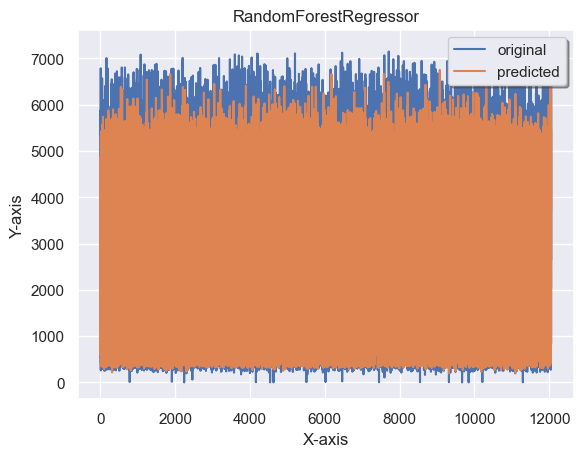

In [191]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print("MAE using RandomForestRegressor: " + str(mean_absolute_error(val_y, melb_preds)))

MSERandomFR = np.sqrt(mean_squared_error(val_y, melb_preds))
print("MSE using RandomForestRegressor: " + str(MSERandomFR))

x_ax = range(len(val_y))
plt.plot(x_ax, val_y, label="original")
plt.plot(x_ax, melb_preds, label="predicted")
plt.title("RandomForestRegressor")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()


# DecisionTreeRegressor

MAE using DecisionTreeRegressor: 791.9270572289988
MSE using DecisionTreeRegressor: 1296.5933870691135


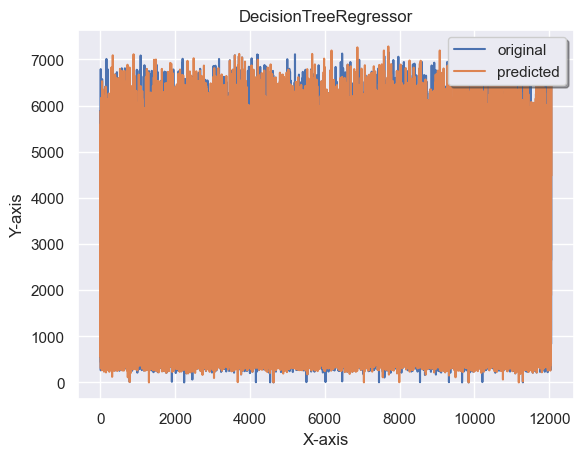

In [192]:
dtr_model = DecisionTreeRegressor()
# Fit model
dtr_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = dtr_model.predict(val_X)
print("MAE using DecisionTreeRegressor: " +
      str(mean_absolute_error(val_y, val_predictions)))

MSEDTR = np.sqrt(mean_squared_error(val_y, val_predictions))
print("MSE using DecisionTreeRegressor: " + str(MSEDTR))

x_ax = range(len(val_y))
plt.plot(x_ax, val_y, label="original")
plt.plot(x_ax, val_predictions, label="predicted")
plt.title("DecisionTreeRegressor")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

# LinearRegression

MAR using LinearRegression: 850.2990967725086
MSE using LinearRegression: 1142.217134587142


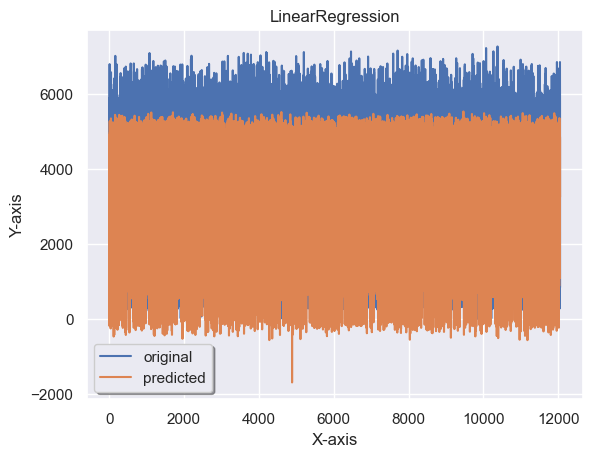

In [193]:
lin_reg = LinearRegression()
lin_reg.fit(train_X, train_y)

# Calculate train set accuracy using mean absolute error
print("MAR using LinearRegression: " + str(mean_absolute_error(lin_reg.predict(val_X), val_y)))

# Calculate train set accuracy using root mean square
MSELR = np.sqrt(mean_squared_error(lin_reg.predict(val_X), val_y))
print("MSE using LinearRegression: " + str(MSELR))

x_ax = range(len(val_y))
plt.plot(x_ax, val_y, label="original")
plt.plot(x_ax, lin_reg.predict(val_X), label="predicted")
plt.title("LinearRegression")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

## RandomForestRegressor function with tuning n_estimators parameter

In [194]:
def get_score(n_estimators):
    my_pipeline = Pipeline(steps=[
        ('preprocessor', SimpleImputer()),
        ('model', RandomForestRegressor(n_estimators, random_state=0))
    ])
    scores = -1 * cross_val_score(my_pipeline, X, y,
                                  cv=3,
                                  scoring='neg_mean_absolute_error')
    return scores.mean()

## Plot with results of multiple n_estimator values

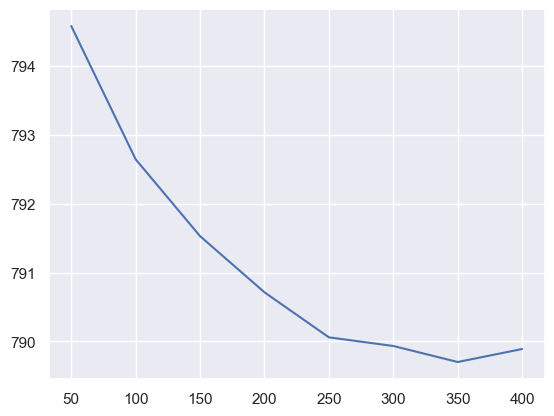

In [199]:
results = {} # Your code here
for i in range(50,450, 50):
    results[i]= get_score(i)

%matplotlib inline

plt.plot(list(results.keys()), list(results.values()))
plt.show()


### Showing best result

In [200]:
#BEST RESULT

print("RandomForestRegressor best result:")
print("n_estimators: "+ str(min(results.items(), key=lambda x: x[1])[0]))
print("mean_absolute_error: "+ str(min(results.items(), key=lambda x: x[1])[1]))

RandomForestRegressor best result:
n_estimators: 350
mean_absolute_error: 789.7002850660447


## Pipeline of Different Models -> needs improvement

In [197]:
# my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
#                               ('model', RandomForestRegressor(n_estimators=50,
#                                                               random_state=0))
#                               ])

# # Multiply by -1 since sklearn calculates *negative* MAE
# scores = -1 * cross_val_score(my_pipeline, X, y,
#                               cv=5,
#                               scoring='neg_mean_absolute_error')
# print(scores)
# print("RandomForestRegressor\nAverage MAE score (across experiments):")
# print(scores.mean())

# my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
#                               ('model', LogisticRegression(
#                                   solver='liblinear', multi_class='ovr'))
#                               ])

# # Multiply by -1 since sklearn calculates *negative* MAE
# scores = -1 * cross_val_score(my_pipeline, X, y,
#                               cv=5,
#                               scoring='neg_mean_absolute_error')

# print("LogisticRegression\nAverage MAE score (across experiments):")
# print(scores.mean())

# my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
#                               ('model', KNeighborsRegressor())
#                               ])

# # Multiply by -1 since sklearn calculates *negative* MAE
# scores = -1 * cross_val_score(my_pipeline, X, y,
#                               cv=5,
#                               scoring='neg_mean_absolute_error')

# print("KNeighborsRegressor\nAverage MAE score (across experiments):")
# print(scores.mean())


# # Print number of unique entries by column, in ascending order
# # sorted(d.items(), key=lambda x: x[1])
# models = []
# models.append(('LR', LogisticRegression(
#     solver='liblinear', multi_class='ovr')))
# # models.append(('LDA', LinearDiscriminantAnalysis()))
# models.append(('KNN', KNeighborsRegressor()))
# models.append(('DTR', DecisionTreeRegressor()))
# # models.append(('NB', GaussianNB()))
# models.append(('LinearSVR', LinearSVR(random_state=0, tol=1e-5)))
# # # evaluate each model in turn
# results = []
# names = []
# for name, model in models:
#  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
#  cv_results = cross_val_score(model, X_train, Y_train, scoring='accuracy')
#  results.append(cv_results)
#  names.append(name)
#  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# # # Compare Algorithms
# plt.boxplot(results, labels=names)
# plt.title('Algorithm Comparison')
# plt.show()


SGDRegressor test example -> needs improvement

R-squared: -2.5839929061376474e+23
MSE:  1.023787841342037e+30
RMSE:  1011824016982220.6


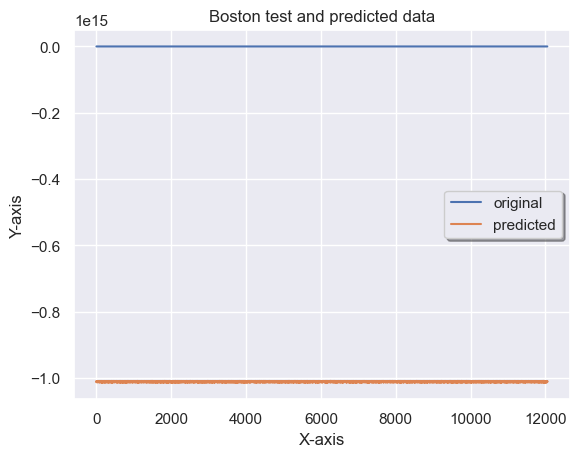

In [198]:
sgdr = SGDRegressor(penalty='elasticnet')
sgdr.fit(train_X, train_y)

score = sgdr.score(train_X, train_y)
print("R-squared:", score)

# cv_score = cross_val_score(lsvr, x, y, cv=5)
# print("CV mean score: ", cv_score.mean())

ypred = sgdr.predict(val_X)

mse = mean_squared_error(val_y, ypred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))

x_ax = range(len(val_y))
plt.plot(x_ax, val_y, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("Boston test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

# sgdr = SGDRegressor()
# print(sgdr)

# sgdr.fit(train_X, train_y)

# score = sgdr.score(train_X, train_y)
# print("R-squared:", score)

# cv_score = cross_val_score(sgdr, X, y, cv = 10)
# print("CV mean score: ", cv_score.mean())

# ypred = sgdr.predict(val_X)

# mae = mean_absolute_error(val_y, ypred)
# mse = mean_squared_error(val_y, ypred)
# print("MAE: ", mae)
# print("MSE: ", mse)
# print("RMSE: ", mse**(1/2.0))

